<a href="https://colab.research.google.com/github/gbiamgaurav/Time-Series/blob/main/TimeSeries_Decompose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to Video explaining the code - https://www.youtube.com/watch?v=pLHm4cvoZiY

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [2]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv', parse_dates = ['Quarter'],date_parser=parse)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  61
Columns  :  3

Features : 
 ['Quarter', 'Revenue', 'Net Income']

Missing values :   Quarter       False
Revenue       False
Net Income    False
dtype: bool

Unique values :  
 Quarter       61
Revenue       61
Net Income    57
dtype: int64


In [5]:
amazon_df=df.set_index("Quarter")

In [6]:
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


<Axes: xlabel='Quarter'>

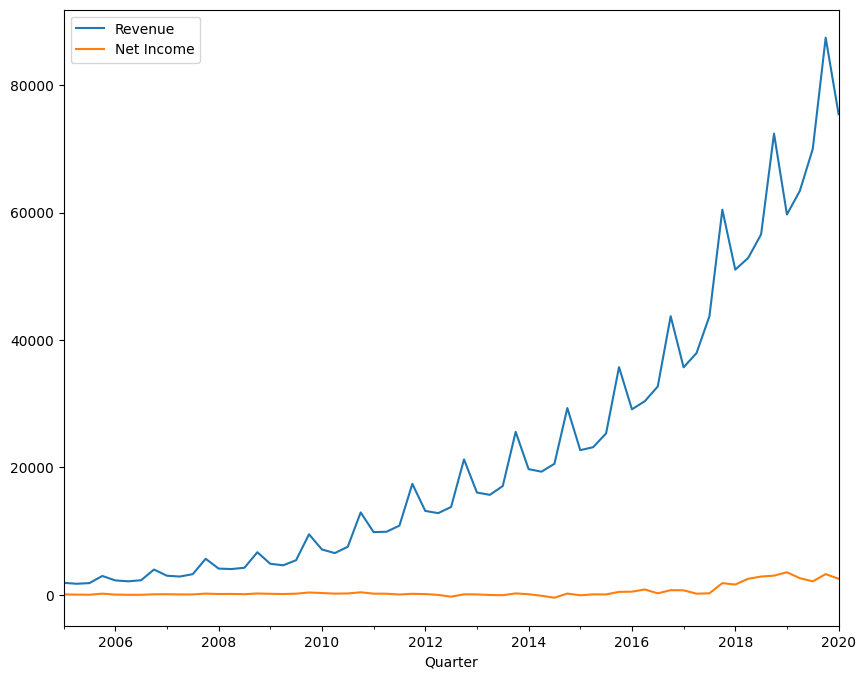

In [7]:
amazon_df.plot()

In [8]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Null hypothesis - data is stationary

Alternate hypothesis - data is not stationary

In [9]:
from statsmodels.tsa.stattools import kpss

In [10]:
tstest = kpss(amazon_df['Revenue'], 'ct')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [11]:
tstest

(0.30665545975169417,
 0.01,
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Additive - ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ec813268e453864276769e12a207c653f0ef67e6)

Multiplicative - ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b3849db82617c2bd2cfe3dc5302496e6468020b9)

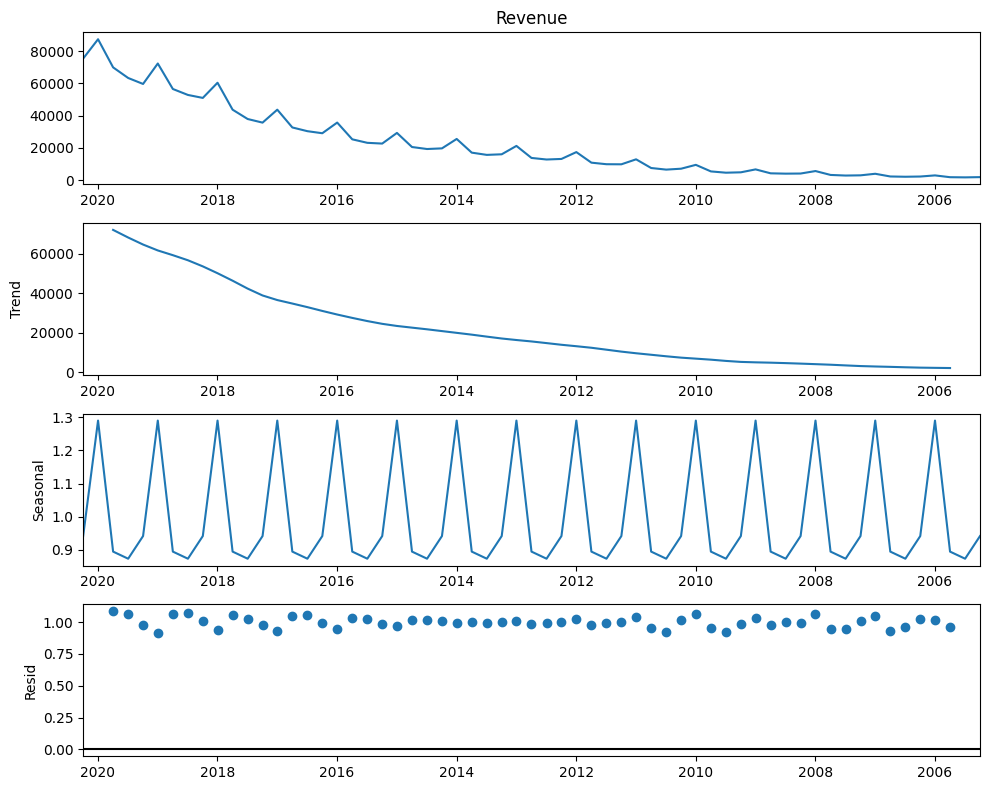

In [12]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(amazon_df['Revenue'],
                                model='multiplicative')

resplot = res.plot()

<Axes: xlabel='Quarter'>

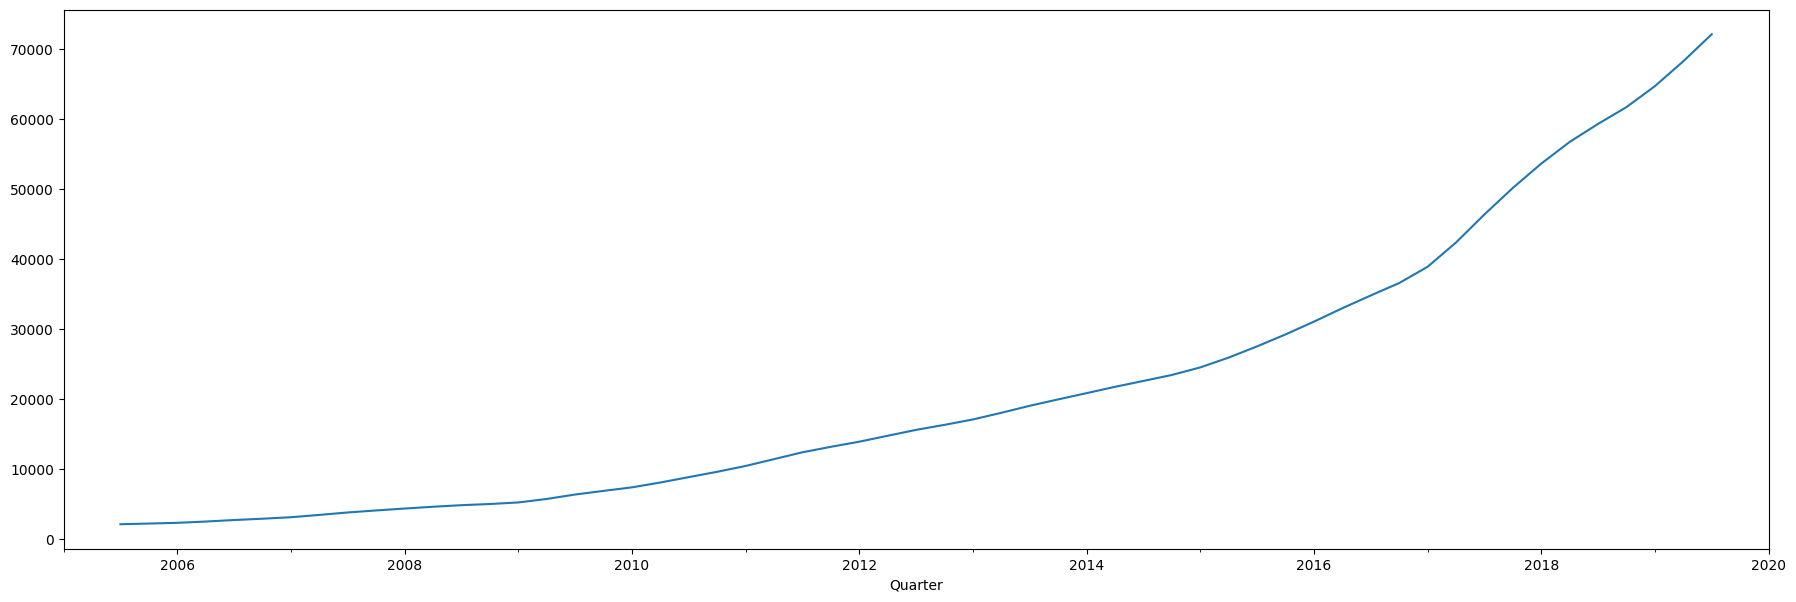

In [13]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [14]:
res.observed

Quarter
2020-03-31    75452.0
2019-12-31    87437.0
2019-09-30    69981.0
2019-06-30    63404.0
2019-03-31    59700.0
               ...   
2006-03-31     2279.0
2005-12-31     2977.0
2005-09-30     1858.0
2005-06-30     1753.0
2005-03-31     1902.0
Name: Revenue, Length: 61, dtype: float64

In [15]:
print(res.trend)

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: trend, Length: 61, dtype: float64


In [16]:
print(res.seasonal)

Quarter
2020-03-31    0.941840
2019-12-31    1.289518
2019-09-30    0.894993
2019-06-30    0.873649
2019-03-31    0.941840
                ...   
2006-03-31    0.941840
2005-12-31    1.289518
2005-09-30    0.894993
2005-06-30    0.873649
2005-03-31    0.941840
Name: seasonal, Length: 61, dtype: float64


In [17]:
res.resid

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: resid, Length: 61, dtype: float64

In [18]:
res.observed[2]

69981.0

In [19]:
res.trend[2]*res.seasonal[2]*res.resid[2]

69980.99999999999

<Axes: xlabel='Quarter'>

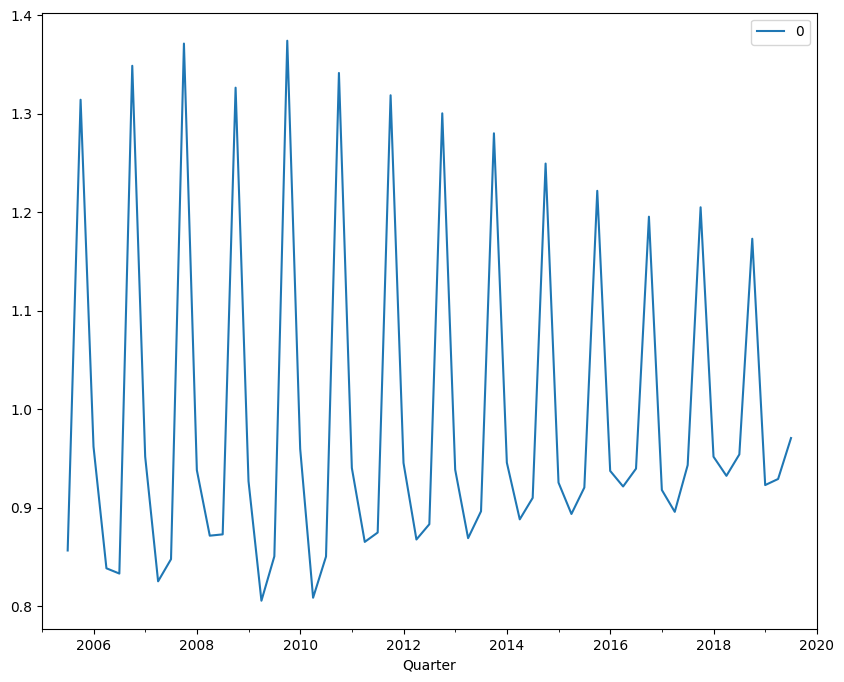

In [20]:
pd.DataFrame(res.observed/res.trend).plot()

In [ ]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [ ]:
bill_2018

Simple moving average = (t + (t-1) + (t-2) + ... + (t-n)) / n

In [ ]:
bill_2018['Billed_amount'].rolling(window=3).mean()

In [ ]:
bill_2018['ma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018.plot();

Weighted moving average = (t * weighting factor) + ((t-1) * weighting factor-1) + ((t-n) * weighting factor-n)/n

In [ ]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [ ]:
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

In [ ]:
bill_2018['wma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018.plot()

Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA


In [ ]:
bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean()

In [ ]:
bill_2018['ewm_window_3']=bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018.plot()

Exponential Smoothing -

![alt text](https://people.duke.edu/~rnau/411avg_files/image028.png)

In [ ]:
bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

In [ ]:
bill_2018['esm_window_3_7']=bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018[['Billed_amount','esm_window_3_7']].plot()

In [ ]:
bill_2018.plot()

In [ ]:
bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False, min_periods=3).mean()

In [ ]:
bill_2018['esm_window_3_3']=bill_2018['Billed_amount'].ewm(alpha=0.3, adjust=False,min_periods=3).mean().shift(1)

In [ ]:
bill_2018

In [ ]:
bill_2018[['Billed_amount','esm_window_3_3']].plot()

In [ ]:
bill_2018[['Billed_amount','esm_window_3_7', 'esm_window_3_3']].plot()

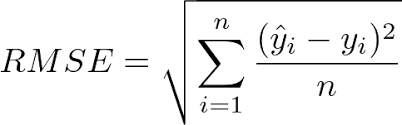

In [ ]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_7'])**2).mean()**0.5

In [ ]:
((bill_2018['Billed_amount']-bill_2018['esm_window_3_3'])**2).mean()**0.5

In [ ]:
ml_dict['FB_Prophet']['forecast']